# Project description

**Author:** Cristian Jeraldo, www.asgeominspa.com

**Date:** June 13, 2024

**Description:** This notebook contains the necessary steps to develop an analytical accuracy analysis, including the visualization of results and the application of statistical measurement techniques. Hyperbolic method based on Armando Simón's methodology.

---

# Importing libreries

In [1]:
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data manipulation
import numpy as np
import pandas as pd

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\__init__.py:169: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Importing data

In [2]:
# Importing data
df = pd.read_csv('precisión_Cu.csv')

In [3]:
df.head(3)

,SAMPLE_ID,Inserto,Cu original,Cu duplicado
0,AAA-1001,1,1.24,1.17
1,AAA-1002,2,1.44,1.42
2,AAA-1003,3,1.60,1.60


In [4]:
df.shape

(284, 4)

# Scatterplot

In [5]:
# Axis setting
x = df['Cu original']
y = df['Cu duplicado']

In [6]:
len(x)

284

In [7]:
# Edit type of control, analyte and laboratorey 
control = 'fine duplicated (DP)' # assay or mechanical preparation
analyte = 'Cu (%)'
lab = 'Bureau Veritas Antofagasta, Chile'

In [8]:
# Tolerance: PD = 0.1 (10%); CD = 0.2 (20%); TS/FD = 0.3 (30%).
tol = 0.1
max_tol = 1 + tol
min_tol = 1 - tol
tol_porc = tol * 100

# Traditional approach

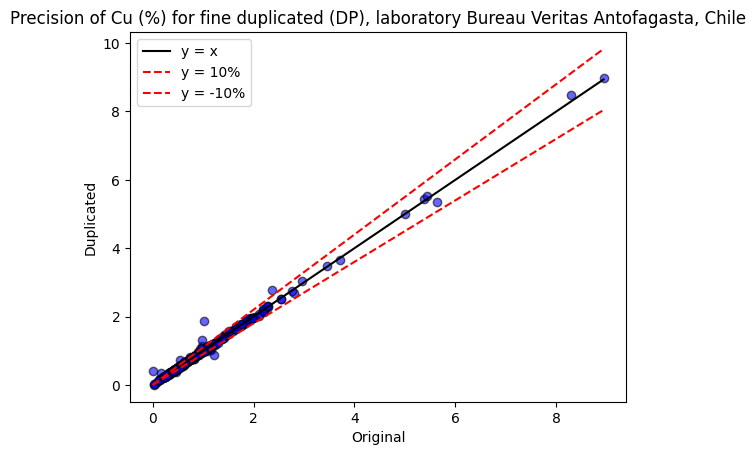

In [9]:
# Scatterplot for analytical precision
fig,ax = plt.subplots()

# Original-duplicated scatterplot 
plt.scatter(x, y, c='blue', edgecolor='black', alpha=0.6)

# y = x line
x_vals = np.linspace(0, max(x), 2)
y_vals = x_vals
plt.plot(x_vals, y_vals, 'k-', label='y = x')

# y = max_tol*x (+tol%) line
y_10_more = max_tol * x_vals
plt.plot(x_vals, y_10_more, 'r--', label='y = {:.0f}%'.format(tol_porc))

# y = (1 - tol)*x (-tol%) line
y_10_less = min_tol * x_vals
plt.plot(x_vals, y_10_less, 'r--', label='y = -{:.0f}%'.format(tol_porc))

# Titles
plt.xlabel('Original')
plt.ylabel('Duplicated')
ax.set_title("Precision of {} for {}, laboratory {}".format(analyte,control,lab))
plt.legend()

# Show plot
plt.show()

# Hyperbolic method

In [10]:
first_500_integers = list(range(501))

In [11]:
x_hip = (np.array(first_500_integers) * max(x)) / 500

In [12]:
# m^2, m is the slope in the function y = m*x
# Acceptable relative error for PD = 0.1 (10%); CD = 0.2 (20%); TS/FD = 0.3 (30%).
er = 0.1 # Edit based on type of control
m = (2 + er) / (2 - 0.1)

***Definition***: The practical detection limit (PDL) in quality control for chemical analysis is the minimum concentration of an analyte that can be detected with a reasonable level of confidence, considering the measurement conditions and background noise. The PDL is higher than the theoretical limit of detection (LOD) due to practical factors such as instrumental variability, the analytical procedure, and sample interferences.

In [13]:
# Practical detection limit calculation
df['ER'] = 2 * abs(x - y) / (x + y) # Calculation and generation of relative error new column
df['average'] = (x + y ) / 2 # Calculation and generation of new column original-duplicated

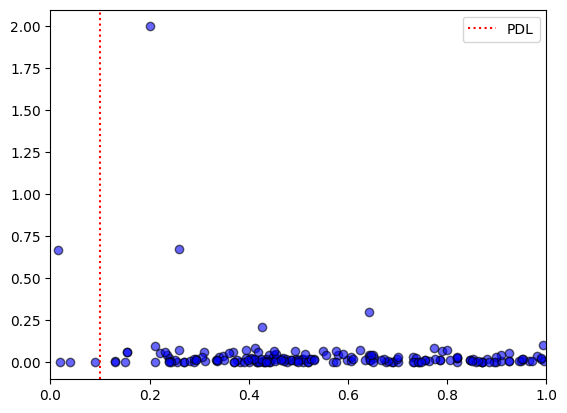

In [14]:
# Scatterplot average assay vs Relative Error (ER)
plt.scatter(df['average'], df['ER'], c='blue', edgecolor='black', alpha=0.6)
plt.xlim(0,1) # rango eje X

# Adding PDL line
plt.axvline(x=0.1, color='red', linestyle=':', label='PDL') # Editar el valor de x, el que corresponde a PDL
plt.legend(); 

***Factor***: depending on the variability of the analyte and the sampling stage, the factors vary as follows:

- Twin samples or field duplicates: 10-20
- Coarse duplicates: 5-10
- Pulp duplicates: 3-5

Use values close to the ***lower limit*** of each range for elements with low variability, such as Cu.
Use values close to the ***upper limit*** of each range for elements with high variability, such as Au.

In [15]:
# b calculation as a parameter in the hyperbolic function 
factor = 3 # Cu EAA factor. Edit as necessary
pdl = 0.1
b = factor * pdl

In [16]:
# y calculation using hyperbolic function
y_hip = np.sqrt(m**2 * x_hip**2 + b**2)

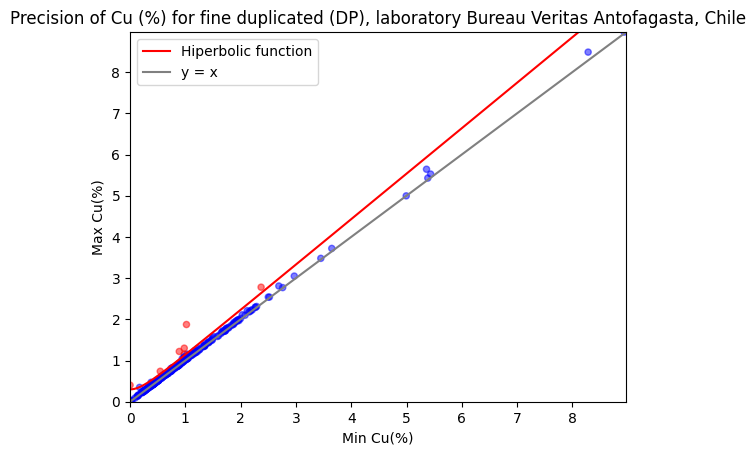

In [22]:
# Scatterplot for analytical precision
fig,ax = plt.subplots()

# hyperbolic function m^2*x^2 + b^2
plt.plot(x_hip, y_hip, c='red', label='Hiperbolic function')

# Create empty lists
x_correct = []
y_correct = []

# Ensure that x is always the smaller of x and y
for i in range(len(x)):
    if x[i] > y[i]:
        x_correct.append(y[i])
        y_correct.append(x[i])
    else:
        x_correct.append(x[i])
        y_correct.append(y[i])
        
# Generate arrays from the two lists
x = np.array(x_correct)
y = np.array(y_correct)
        
# x (original analytical data) interpolation using hyperbolic function for scatterplot
y_interpolated_curved = np.sqrt(m**2 * x**2 + b**2)
        
# Coloring the dots
colors = np.where(y > y_interpolated_curved, 'r', 'b')

# # Original-duplicated scatterplot 
plt.scatter(x, y, c=colors, alpha=0.5, s=20)

# y = x line
x_vals = np.linspace(0, max(y), 2)
y_vals = x_vals
plt.plot(x_vals, y_vals, c='grey', label='y = x')

# Edit axis Y and X ranges
plt.ylim([0.0,max(y)])
plt.xlim([0.0,max(y)])

# Counting dots over hyperbolic function (red dots)
num_points_over_hip = np.sum(colors == 'r')

# Titles
plt.xlabel('Min Cu(%)') # Edit analyte
plt.ylabel('Max Cu(%)') # Edit analyte
ax.set_title("Precision of {} for {}, laboratory {}".format(analyte,control,lab))
plt.legend()

# Show plot
plt.show()

# Percentage of points over specification limit

In [18]:
# Percentage of fails
fails = num_points_over_hip / len(x) * 100

In [19]:
print("The percentage of fails of {} for {} in laboratory {} is {:.2f}".format(control,analyte,lab,fails))

The percentage of fails of fine duplicated (DP) for Cu (%) in laboratory Bureau Veritas Antofagasta, Chile is 2.46


**Conclusion:**
- Add.